In [2]:
#importing relev. libs
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization

#importing data
df = pd.read_csv('../data/arganguez_feeder_data.csv',parse_dates=[0])
df.set_index('Timestamp',inplace=True)
df.drop(['Times'],inplace=True,axis=1)
df_proc = df.resample('15T').asfreq().sort_index(ascending=False)

#cleaning data
missing_segments = df_proc[df_proc.isna().any(axis=1)]

# Print the missing segments, if any
if len(missing_segments) > 0:
    df_proc = df_proc.interpolate('linear')
    print("\n{} segments corrected:".format(len(missing_segments)))
else:
    print("No missing segments.")

#Splitting load into subsequences


1 segments corrected:


# Creating Subsequences

In [3]:
#setting up containers to store data
jan_wk1,jan_wk2,jan_wk3,jan_wk4 = [],[],[],[]
feb_wk1,feb_wk2,feb_wk3,feb_wk4 = [],[],[],[]

In [4]:
#Creating subsequences of each week and storing the days as elements of the list
for i in range(0,7):
    start = '2016-01-04 00:00:00'
    jan_wk1.append(df_proc[str(pd.to_datetime(start) + pd.Timedelta(days=i)):str(pd.to_datetime(start) + pd.Timedelta(days=(i+1)))])
    jan_wk2.append(df_proc[ str(pd.to_datetime(start) + pd.Timedelta(weeks=1, days=i)):str(pd.to_datetime(start) + pd.Timedelta(weeks=1, days=(i+1))) ])
    jan_wk3.append(df_proc[ str(pd.to_datetime(start) + pd.Timedelta(weeks=2, days=i)):str(pd.to_datetime(start) + pd.Timedelta(weeks=2, days=(i+1))) ])
    jan_wk4.append(df_proc[ str(pd.to_datetime(start) + pd.Timedelta(weeks=3, days=i)):str(pd.to_datetime(start) + pd.Timedelta(weeks=3, days=(i+1))) ])
    start='2016-02-01 00:00:00'
    feb_wk1.append(df_proc[str(pd.to_datetime(start) + pd.Timedelta(days=i)):str(pd.to_datetime(start) + pd.Timedelta(days=(i+1)))])
    feb_wk2.append(df_proc[ str(pd.to_datetime(start) + pd.Timedelta(weeks=1, days=i)):str(pd.to_datetime(start) + pd.Timedelta(weeks=1, days=(i+1))) ])
    feb_wk3.append(df_proc[ str(pd.to_datetime(start) + pd.Timedelta(weeks=2, days=i)):str(pd.to_datetime(start) + pd.Timedelta(weeks=2, days=(i+1))) ])

start='2016-02-01 00:00:00'
end = '2016-02-25 08:45:00'
feb_wk4.append(df_proc[ str(pd.to_datetime(start) + pd.Timedelta(weeks=3, days=0)):str(pd.to_datetime(start) + pd.Timedelta(weeks=3, days=1)) ])
feb_wk4.append(df_proc[ str(pd.to_datetime(start) + pd.Timedelta(weeks=3, days=1)):str(pd.to_datetime(start) + pd.Timedelta(weeks=3, days=2)) ])
feb_wk4.append(df_proc[ str(pd.to_datetime(start) + pd.Timedelta(weeks=3, days=2)):str(pd.to_datetime(start) + pd.Timedelta(weeks=3, days=3)) ])
feb_wk4.append(df_proc[ str(pd.to_datetime(start) + pd.Timedelta(weeks=3, days=3)):end ])

In [5]:
#dropping overlaps of the 0th hour from the preceding day then reversing the order to ascending to become chronological.
jan_wk1 = list(map(lambda x:x.drop(index=x.index[0], axis=0).iloc[::-1]['P total_SJN'], jan_wk1)) 
jan_wk2 = list(map(lambda x:x.drop(index=x.index[0], axis=0).iloc[::-1]['P total_SJN'], jan_wk2)) 
jan_wk3 = list(map(lambda x:x.drop(index=x.index[0], axis=0).iloc[::-1]['P total_SJN'], jan_wk3)) 
jan_wk4 = list(map(lambda x:x.drop(index=x.index[0], axis=0).iloc[::-1]['P total_SJN'], jan_wk4)) 
feb_wk1 = list(map(lambda x:x.drop(index=x.index[0], axis=0).iloc[::-1]['P total_SJN'], feb_wk1)) 
feb_wk2 = list(map(lambda x:x.drop(index=x.index[0], axis=0).iloc[::-1]['P total_SJN'], feb_wk2)) 
feb_wk3 = list(map(lambda x:x.drop(index=x.index[0], axis=0).iloc[::-1]['P total_SJN'], feb_wk3)) 
feb_wk4 = list(map(lambda x:x.drop(index=x.index[0], axis=0).iloc[::-1]['P total_SJN'], feb_wk4)) 

In [6]:
#checking if subsequences were sliced correctly
subseq_check = np.array([jan_wk1[0].index[0].weekday() == 0,
jan_wk1[6].index[0].weekday() == 6,
jan_wk2[0].index[0].weekday() == 0,
jan_wk2[6].index[0].weekday() == 6,
jan_wk3[0].index[0].weekday() == 0,
jan_wk3[6].index[0].weekday() == 6,
jan_wk4[0].index[0].weekday() == 0,
jan_wk4[6].index[0].weekday() == 6,
feb_wk1[0].index[0].weekday() == 0,
feb_wk1[6].index[0].weekday() == 6,
feb_wk2[0].index[0].weekday() == 0,
feb_wk2[6].index[0].weekday() == 6,
feb_wk3[0].index[0].weekday() == 0,
feb_wk3[6].index[0].weekday() == 6])
np.all(subseq_check)

True

In [7]:
#Grouping like weekdays into sequences to compare their visual fits and euclidean distances.

mon1 = jan_wk1[0].to_frame().reset_index().rename(columns={'P total_SJN':'JMON-1:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
mon2 = jan_wk2[0].to_frame().reset_index().rename(columns={'P total_SJN':'JMON-2:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
mon3 = jan_wk3[0].to_frame().reset_index().rename(columns={'P total_SJN':'JMON-3:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
mon4 = jan_wk4[0].to_frame().reset_index().rename(columns={'P total_SJN':'JMON-4:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
jan_mondays = pd.concat([mon1,mon2,mon3,mon4],axis=1)

tue1 = jan_wk1[1].to_frame().reset_index().rename(columns={'P total_SJN':'JTUE-1:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
tue2 = jan_wk2[1].to_frame().reset_index().rename(columns={'P total_SJN':'JTUE-2:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
tue3 = jan_wk3[1].to_frame().reset_index().rename(columns={'P total_SJN':'JTUE-3:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
tue4 = jan_wk4[1].to_frame().reset_index().rename(columns={'P total_SJN':'JTUE-4:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
jan_tuesdays = pd.concat([tue1,tue2,tue3,tue4],axis=1)

wed1 = jan_wk1[2].to_frame().reset_index().rename(columns={'P total_SJN':'JWED-1:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
wed2 = jan_wk2[2].to_frame().reset_index().rename(columns={'P total_SJN':'JWED-2:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
wed3 = jan_wk3[2].to_frame().reset_index().rename(columns={'P total_SJN':'JWED-3:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
wed4 = jan_wk4[2].to_frame().reset_index().rename(columns={'P total_SJN':'JWED-4:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
jan_wednesdays = pd.concat([wed1,wed2,wed3,wed4],axis=1)

thu1 = jan_wk1[3].to_frame().reset_index().rename(columns={'P total_SJN':'JTHU-1:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
thu2 = jan_wk2[3].to_frame().reset_index().rename(columns={'P total_SJN':'JTHU-2:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
thu3 = jan_wk3[3].to_frame().reset_index().rename(columns={'P total_SJN':'JTHU-3:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
thu4 = jan_wk4[3].to_frame().reset_index().rename(columns={'P total_SJN':'JTHU-4:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
jan_thursdays = pd.concat([thu1,thu2,thu3,thu4],axis=1)

fri1 = jan_wk1[4].to_frame().reset_index().rename(columns={'P total_SJN':'JFRI-1:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
fri2 = jan_wk2[4].to_frame().reset_index().rename(columns={'P total_SJN':'JFRI-2:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
fri3 = jan_wk3[4].to_frame().reset_index().rename(columns={'P total_SJN':'JFRI-3:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
fri4 = jan_wk4[4].to_frame().reset_index().rename(columns={'P total_SJN':'JFRI-4:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
jan_fridays = pd.concat([fri1,fri2,fri3,fri4],axis=1)

sat1 = jan_wk1[5].to_frame().reset_index().rename(columns={'P total_SJN':'JSAT-1:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
sat2 = jan_wk2[5].to_frame().reset_index().rename(columns={'P total_SJN':'JSAT-2:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
sat3 = jan_wk3[5].to_frame().reset_index().rename(columns={'P total_SJN':'JSAT-3:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
sat4 = jan_wk4[5].to_frame().reset_index().rename(columns={'P total_SJN':'JSAT-4:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
jan_saturdays = pd.concat([sat1,sat2,sat3,sat4],axis=1)

sun1 = jan_wk1[6].to_frame().reset_index().rename(columns={'P total_SJN':'JSUN-1:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
sun2 = jan_wk2[6].to_frame().reset_index().rename(columns={'P total_SJN':'JSUN-2:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
sun3 = jan_wk3[6].to_frame().reset_index().rename(columns={'P total_SJN':'JSUN-3:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
sun4 = jan_wk4[6].to_frame().reset_index().rename(columns={'P total_SJN':'JSUN-4:P_TOTAL_SJN'}).drop('Timestamp',axis=1)
jan_sundays = pd.concat([sun1,sun2,sun3,sun4],axis=1)
#pd.merge(m1,m2,m3,m4,on='index')

In [8]:
#changing x-axis to reflect time
jan_mondays.set_index(pd.date_range(start='00:00', end='23:45', freq='15min').time, inplace=True)
jan_tuesdays.set_index(pd.date_range(start='00:00', end='23:45', freq='15min').time, inplace=True)
jan_wednesdays.set_index(pd.date_range(start='00:00', end='23:45', freq='15min').time, inplace=True)
jan_thursdays.set_index(pd.date_range(start='00:00', end='23:45', freq='15min').time, inplace=True)
jan_fridays.set_index(pd.date_range(start='00:00', end='23:45', freq='15min').time, inplace=True)
jan_saturdays.set_index(pd.date_range(start='00:00', end='23:45', freq='15min').time, inplace=True)
jan_sundays.set_index(pd.date_range(start='00:00', end='23:45', freq='15min').time, inplace=True)

The extreme changes in load are not part of the general pattern and hence they will be changed via interpolation

# Assessing Simililarity in Load Data

## Visual Inspection


### Testing how similar the weekdays are to themselves over the January and February Period

<AxesSubplot: xlabel='time'>

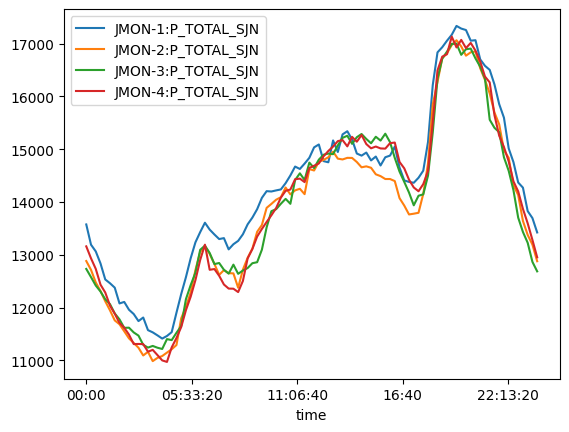

In [19]:
#reducing extreme values
jan_mondays.plot()

<AxesSubplot: xlabel='time'>

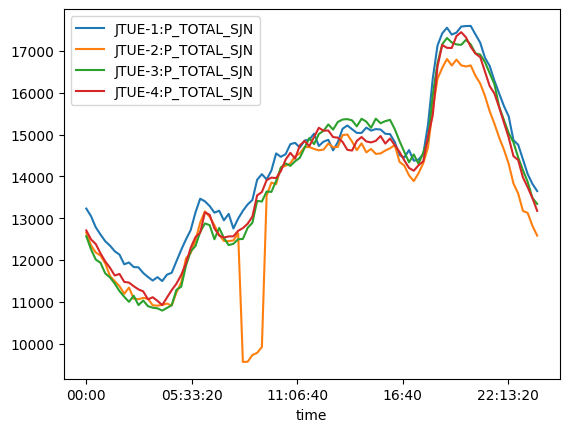

In [20]:
jan_tuesdays.plot()

<AxesSubplot: xlabel='time'>

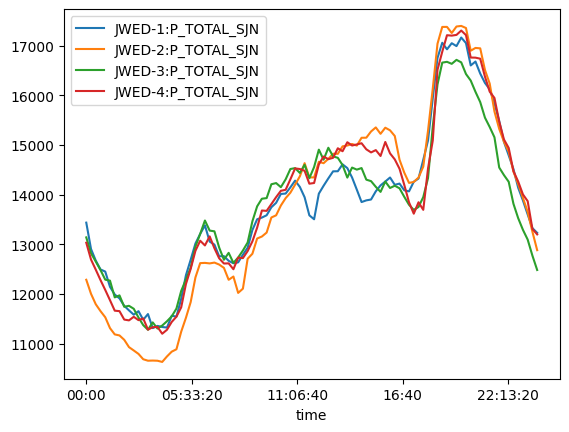

In [21]:
jan_wednesdays.plot()

<AxesSubplot: xlabel='time'>

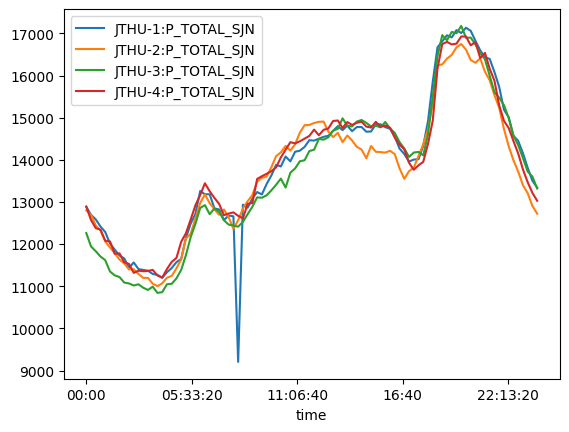

In [22]:
jan_thursdays.plot()

<AxesSubplot: xlabel='time'>

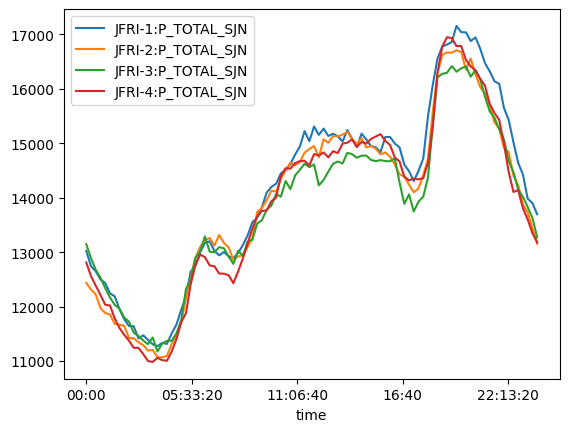

In [23]:
jan_fridays.plot()

<AxesSubplot: xlabel='time'>

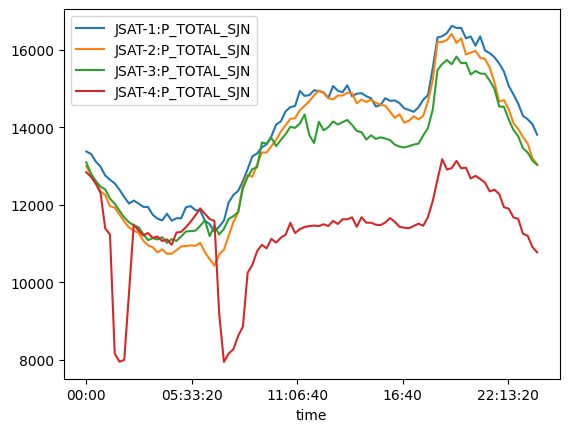

In [24]:
jan_saturdays.plot()

<AxesSubplot: xlabel='time'>

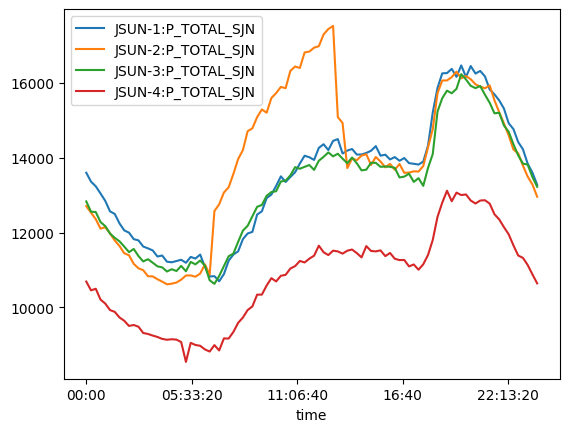

In [25]:
jan_sundays.plot()

## Matrix Profile

The matrix profile is used to calculate how similar the shape of the time series is throughout the data. It ignores the effect of amplitude on similarity due to normalization of the data. Time series motifs are approximately repeated subsequences found within a longer time series. There should be a global motif and then other k-motifs. 

In [28]:
import stumpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

In [29]:
df_proc

,S total_SJN,P total_SJN,Q total_SJN,pf total_SJN
Timestamp,,,,
2016-02-25 08:45:00,12681.963,12242.791,3308.515,0.965
2016-02-25 08:30:00,12220.026,11800.326,3175.114,0.966
2016-02-25 08:15:00,12211.772,11787.791,3189.885,0.965
2016-02-25 08:00:00,11806.309,11435.935,2933.994,0.969
2016-02-25 07:45:00,11728.820,11377.988,2847.211,0.970
...,...,...,...,...
2016-01-01 01:00:00,13961.358,13551.752,3357.015,0.971
2016-01-01 00:45:00,14039.635,13630.260,3365.615,0.971
2016-01-01 00:30:00,14160.296,13751.502,3377.893,0.971


In [33]:
m = (15*4*23)+45
mp = stumpy.stump(df_proc['P total_SJN'], m)
motif_idx = np.argsort(mp[:, 0])[0]
print(f"The motif is located at index {motif_idx}")


The motif is located at index 2666


In [34]:
nearest_neighbor_idx = mp[motif_idx, 1]
print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")

The nearest neighbor is located at index 3242


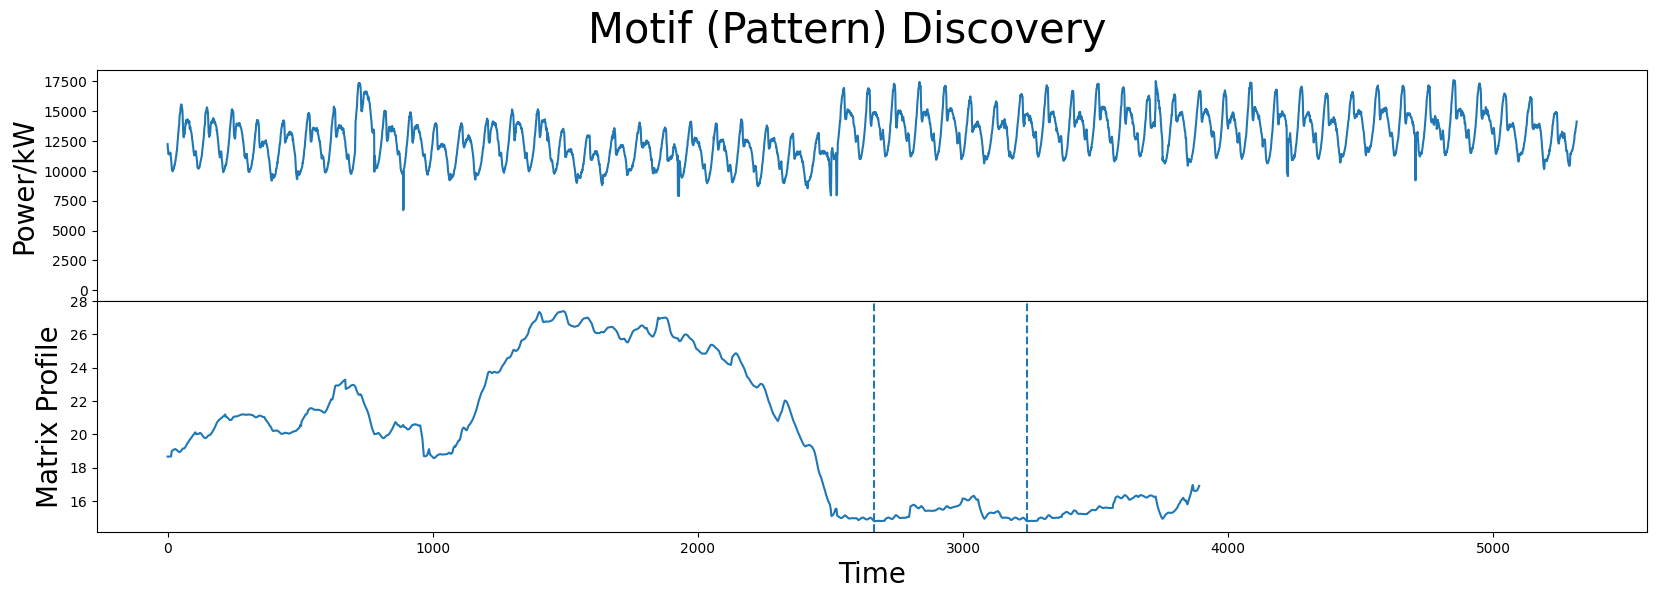

In [35]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')

axs[0].plot(df_proc['P total_SJN'].values)
axs[0].set_ylabel('Power/kW', fontsize='20')
rect = Rectangle((motif_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((nearest_neighbor_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=motif_idx, linestyle="dashed")
axs[1].axvline(x=nearest_neighbor_idx, linestyle="dashed")
axs[1].plot(mp[:, 0])
plt.show()

I can't figure out how to find multiple repeats(more than 1 repeat) of the input pattern in the time series data. ChatGPT recommended using stumped. 

## Euclidean Distance

In [42]:
jan_mondays

,JMON-1:P_TOTAL_SJN,JMON-2:P_TOTAL_SJN,JMON-3:P_TOTAL_SJN,JMON-4:P_TOTAL_SJN
00:00:00,13575.423,12882.394,12732.352,13160.015
00:15:00,13191.545,12714.635,12577.430,12933.261
00:30:00,13064.414,12476.851,12417.855,12733.229
00:45:00,12836.590,12314.395,12304.554,12434.646
01:00:00,12532.873,12120.047,12158.334,12285.742
...,...,...,...,...
22:45:00,14370.266,14132.793,13704.106,14201.499
23:00:00,14272.394,13641.333,13432.422,13870.278
23:15:00,13828.362,13377.642,13227.602,13597.086
23:30:00,13695.979,13192.980,12866.073,13281.685


In [10]:
#calculating euclidean distances for each monday to each other
JMON12_ED = np.linalg.norm(jan_mondays['JMON-1:P_TOTAL_SJN'] - jan_mondays['JMON-2:P_TOTAL_SJN'])
JMON13_ED = np.linalg.norm(jan_mondays['JMON-1:P_TOTAL_SJN'] - jan_mondays['JMON-3:P_TOTAL_SJN'])
JMON14_ED = np.linalg.norm(jan_mondays['JMON-1:P_TOTAL_SJN'] - jan_mondays['JMON-4:P_TOTAL_SJN'])

JMON21_ED = np.linalg.norm(jan_mondays['JMON-2:P_TOTAL_SJN'] - jan_mondays['JMON-1:P_TOTAL_SJN'])
JMON23_ED = np.linalg.norm(jan_mondays['JMON-2:P_TOTAL_SJN'] - jan_mondays['JMON-3:P_TOTAL_SJN'])
JMON24_ED = np.linalg.norm(jan_mondays['JMON-2:P_TOTAL_SJN'] - jan_mondays['JMON-4:P_TOTAL_SJN'])

JMON31_ED = np.linalg.norm(jan_mondays['JMON-3:P_TOTAL_SJN'] - jan_mondays['JMON-1:P_TOTAL_SJN'])
JMON32_ED = np.linalg.norm(jan_mondays['JMON-3:P_TOTAL_SJN'] - jan_mondays['JMON-2:P_TOTAL_SJN'])
JMON34_ED = np.linalg.norm(jan_mondays['JMON-3:P_TOTAL_SJN'] - jan_mondays['JMON-4:P_TOTAL_SJN'])

JMON41_ED = np.linalg.norm(jan_mondays['JMON-4:P_TOTAL_SJN'] - jan_mondays['JMON-1:P_TOTAL_SJN'])
JMON42_ED = np.linalg.norm(jan_mondays['JMON-4:P_TOTAL_SJN'] - jan_mondays['JMON-2:P_TOTAL_SJN'])
JMON43_ED = np.linalg.norm(jan_mondays['JMON-4:P_TOTAL_SJN'] - jan_mondays['JMON-3:P_TOTAL_SJN'])

#calculating euclidean distances for each tuesday to each other
JTUE12_ED = np.linalg.norm(jan_tuesdays['JTUE-1:P_TOTAL_SJN'] - jan_tuesdays['JTUE-2:P_TOTAL_SJN'])
JTUE13_ED = np.linalg.norm(jan_tuesdays['JTUE-1:P_TOTAL_SJN'] - jan_tuesdays['JTUE-3:P_TOTAL_SJN'])
JTUE14_ED = np.linalg.norm(jan_tuesdays['JTUE-1:P_TOTAL_SJN'] - jan_tuesdays['JTUE-4:P_TOTAL_SJN'])

JTUE21_ED = np.linalg.norm(jan_tuesdays['JTUE-2:P_TOTAL_SJN'] - jan_tuesdays['JTUE-1:P_TOTAL_SJN'])
JTUE23_ED = np.linalg.norm(jan_tuesdays['JTUE-2:P_TOTAL_SJN'] - jan_tuesdays['JTUE-3:P_TOTAL_SJN'])
JTUE24_ED = np.linalg.norm(jan_tuesdays['JTUE-2:P_TOTAL_SJN'] - jan_tuesdays['JTUE-4:P_TOTAL_SJN'])

JTUE31_ED = np.linalg.norm(jan_tuesdays['JTUE-3:P_TOTAL_SJN'] - jan_tuesdays['JTUE-1:P_TOTAL_SJN'])
JTUE32_ED = np.linalg.norm(jan_tuesdays['JTUE-3:P_TOTAL_SJN'] - jan_tuesdays['JTUE-2:P_TOTAL_SJN'])
JTUE34_ED = np.linalg.norm(jan_tuesdays['JTUE-3:P_TOTAL_SJN'] - jan_tuesdays['JTUE-4:P_TOTAL_SJN'])

JTUE41_ED = np.linalg.norm(jan_tuesdays['JTUE-4:P_TOTAL_SJN'] - jan_tuesdays['JTUE-1:P_TOTAL_SJN'])
JTUE42_ED = np.linalg.norm(jan_tuesdays['JTUE-4:P_TOTAL_SJN'] - jan_tuesdays['JTUE-2:P_TOTAL_SJN'])
JTUE43_ED = np.linalg.norm(jan_tuesdays['JTUE-4:P_TOTAL_SJN'] - jan_tuesdays['JTUE-3:P_TOTAL_SJN'])

#calculating euclidean distances for each wednesday to each other
JWED12_ED = np.linalg.norm(jan_wednesdays['JWED-1:P_TOTAL_SJN'] - jan_wednesdays['JWED-2:P_TOTAL_SJN'])
JWED13_ED = np.linalg.norm(jan_wednesdays['JWED-1:P_TOTAL_SJN'] - jan_wednesdays['JWED-3:P_TOTAL_SJN'])
JWED14_ED = np.linalg.norm(jan_wednesdays['JWED-1:P_TOTAL_SJN'] - jan_wednesdays['JWED-4:P_TOTAL_SJN'])

JWED21_ED = np.linalg.norm(jan_wednesdays['JWED-2:P_TOTAL_SJN'] - jan_wednesdays['JWED-1:P_TOTAL_SJN'])
JWED23_ED = np.linalg.norm(jan_wednesdays['JWED-2:P_TOTAL_SJN'] - jan_wednesdays['JWED-3:P_TOTAL_SJN'])
JWED24_ED = np.linalg.norm(jan_wednesdays['JWED-2:P_TOTAL_SJN'] - jan_wednesdays['JWED-4:P_TOTAL_SJN'])

JWED31_ED = np.linalg.norm(jan_wednesdays['JWED-3:P_TOTAL_SJN'] - jan_wednesdays['JWED-1:P_TOTAL_SJN'])
JWED32_ED = np.linalg.norm(jan_wednesdays['JWED-3:P_TOTAL_SJN'] - jan_wednesdays['JWED-2:P_TOTAL_SJN'])
JWED34_ED = np.linalg.norm(jan_wednesdays['JWED-3:P_TOTAL_SJN'] - jan_wednesdays['JWED-4:P_TOTAL_SJN'])

JWED41_ED = np.linalg.norm(jan_wednesdays['JWED-4:P_TOTAL_SJN'] - jan_wednesdays['JWED-1:P_TOTAL_SJN'])
JWED42_ED = np.linalg.norm(jan_wednesdays['JWED-4:P_TOTAL_SJN'] - jan_wednesdays['JWED-2:P_TOTAL_SJN'])
JWED43_ED = np.linalg.norm(jan_wednesdays['JWED-4:P_TOTAL_SJN'] - jan_wednesdays['JWED-3:P_TOTAL_SJN'])

#calculating euclidean distances for each thursday to each other
JTHU12_ED = np.linalg.norm(jan_thursdays['JTHU-1:P_TOTAL_SJN'] - jan_thursdays['JTHU-2:P_TOTAL_SJN'])
JTHU13_ED = np.linalg.norm(jan_thursdays['JTHU-1:P_TOTAL_SJN'] - jan_thursdays['JTHU-3:P_TOTAL_SJN'])
JTHU14_ED = np.linalg.norm(jan_thursdays['JTHU-1:P_TOTAL_SJN'] - jan_thursdays['JTHU-4:P_TOTAL_SJN'])

JTHU21_ED = np.linalg.norm(jan_thursdays['JTHU-2:P_TOTAL_SJN'] - jan_thursdays['JTHU-1:P_TOTAL_SJN'])
JTHU23_ED = np.linalg.norm(jan_thursdays['JTHU-2:P_TOTAL_SJN'] - jan_thursdays['JTHU-3:P_TOTAL_SJN'])
JTHU24_ED = np.linalg.norm(jan_thursdays['JTHU-2:P_TOTAL_SJN'] - jan_thursdays['JTHU-4:P_TOTAL_SJN'])

JTHU31_ED = np.linalg.norm(jan_thursdays['JTHU-3:P_TOTAL_SJN'] - jan_thursdays['JTHU-1:P_TOTAL_SJN'])
JTHU32_ED = np.linalg.norm(jan_thursdays['JTHU-3:P_TOTAL_SJN'] - jan_thursdays['JTHU-2:P_TOTAL_SJN'])
JTHU34_ED = np.linalg.norm(jan_thursdays['JTHU-3:P_TOTAL_SJN'] - jan_thursdays['JTHU-4:P_TOTAL_SJN'])

JTHU41_ED = np.linalg.norm(jan_thursdays['JTHU-4:P_TOTAL_SJN'] - jan_thursdays['JTHU-1:P_TOTAL_SJN'])
JTHU42_ED = np.linalg.norm(jan_thursdays['JTHU-4:P_TOTAL_SJN'] - jan_thursdays['JTHU-2:P_TOTAL_SJN'])
JTHU43_ED = np.linalg.norm(jan_thursdays['JTHU-4:P_TOTAL_SJN'] - jan_thursdays['JTHU-3:P_TOTAL_SJN'])


#calculating euclidean distances for each friday to each other
JFRI12_ED = np.linalg.norm(jan_fridays['JFRI-1:P_TOTAL_SJN'] - jan_fridays['JFRI-2:P_TOTAL_SJN'])
JFRI13_ED = np.linalg.norm(jan_fridays['JFRI-1:P_TOTAL_SJN'] - jan_fridays['JFRI-3:P_TOTAL_SJN'])
JFRI14_ED = np.linalg.norm(jan_fridays['JFRI-1:P_TOTAL_SJN'] - jan_fridays['JFRI-4:P_TOTAL_SJN'])

JFRI21_ED = np.linalg.norm(jan_fridays['JFRI-2:P_TOTAL_SJN'] - jan_fridays['JFRI-1:P_TOTAL_SJN'])
JFRI23_ED = np.linalg.norm(jan_fridays['JFRI-2:P_TOTAL_SJN'] - jan_fridays['JFRI-3:P_TOTAL_SJN'])
JFRI24_ED = np.linalg.norm(jan_fridays['JFRI-2:P_TOTAL_SJN'] - jan_fridays['JFRI-4:P_TOTAL_SJN'])

JFRI31_ED = np.linalg.norm(jan_fridays['JFRI-3:P_TOTAL_SJN'] - jan_fridays['JFRI-1:P_TOTAL_SJN'])
JFRI32_ED = np.linalg.norm(jan_fridays['JFRI-3:P_TOTAL_SJN'] - jan_fridays['JFRI-2:P_TOTAL_SJN'])
JFRI34_ED = np.linalg.norm(jan_fridays['JFRI-3:P_TOTAL_SJN'] - jan_fridays['JFRI-4:P_TOTAL_SJN'])

JFRI41_ED = np.linalg.norm(jan_fridays['JFRI-4:P_TOTAL_SJN'] - jan_fridays['JFRI-1:P_TOTAL_SJN'])
JFRI42_ED = np.linalg.norm(jan_fridays['JFRI-4:P_TOTAL_SJN'] - jan_fridays['JFRI-2:P_TOTAL_SJN'])
JFRI43_ED = np.linalg.norm(jan_fridays['JFRI-4:P_TOTAL_SJN'] - jan_fridays['JFRI-3:P_TOTAL_SJN'])

#calculating euclidean distances for each saturday to each other
JSAT12_ED = np.linalg.norm(jan_saturdays['JSAT-1:P_TOTAL_SJN'] - jan_saturdays['JSAT-2:P_TOTAL_SJN'])
JSAT13_ED = np.linalg.norm(jan_saturdays['JSAT-1:P_TOTAL_SJN'] - jan_saturdays['JSAT-3:P_TOTAL_SJN'])
JSAT14_ED = np.linalg.norm(jan_saturdays['JSAT-1:P_TOTAL_SJN'] - jan_saturdays['JSAT-4:P_TOTAL_SJN'])

JSAT21_ED = np.linalg.norm(jan_saturdays['JSAT-2:P_TOTAL_SJN'] - jan_saturdays['JSAT-1:P_TOTAL_SJN'])
JSAT23_ED = np.linalg.norm(jan_saturdays['JSAT-2:P_TOTAL_SJN'] - jan_saturdays['JSAT-3:P_TOTAL_SJN'])
JSAT24_ED = np.linalg.norm(jan_saturdays['JSAT-2:P_TOTAL_SJN'] - jan_saturdays['JSAT-4:P_TOTAL_SJN'])

JSAT31_ED = np.linalg.norm(jan_saturdays['JSAT-3:P_TOTAL_SJN'] - jan_saturdays['JSAT-1:P_TOTAL_SJN'])
JSAT32_ED = np.linalg.norm(jan_saturdays['JSAT-3:P_TOTAL_SJN'] - jan_saturdays['JSAT-2:P_TOTAL_SJN'])
JSAT34_ED = np.linalg.norm(jan_saturdays['JSAT-3:P_TOTAL_SJN'] - jan_saturdays['JSAT-4:P_TOTAL_SJN'])

JSAT41_ED = np.linalg.norm(jan_saturdays['JSAT-4:P_TOTAL_SJN'] - jan_saturdays['JSAT-1:P_TOTAL_SJN'])
JSAT42_ED = np.linalg.norm(jan_saturdays['JSAT-4:P_TOTAL_SJN'] - jan_saturdays['JSAT-2:P_TOTAL_SJN'])
JSAT43_ED = np.linalg.norm(jan_saturdays['JSAT-4:P_TOTAL_SJN'] - jan_saturdays['JSAT-3:P_TOTAL_SJN'])

#calculating euclidean distances for each sunday to each other
JSUN12_ED = np.linalg.norm(jan_sundays['JSUN-1:P_TOTAL_SJN'] - jan_sundays['JSUN-2:P_TOTAL_SJN'])
JSUN13_ED = np.linalg.norm(jan_sundays['JSUN-1:P_TOTAL_SJN'] - jan_sundays['JSUN-3:P_TOTAL_SJN'])
JSUN14_ED = np.linalg.norm(jan_sundays['JSUN-1:P_TOTAL_SJN'] - jan_sundays['JSUN-4:P_TOTAL_SJN'])

JSUN21_ED = np.linalg.norm(jan_sundays['JSUN-2:P_TOTAL_SJN'] - jan_sundays['JSUN-1:P_TOTAL_SJN'])
JSUN23_ED = np.linalg.norm(jan_sundays['JSUN-2:P_TOTAL_SJN'] - jan_sundays['JSUN-3:P_TOTAL_SJN'])
JSUN24_ED = np.linalg.norm(jan_sundays['JSUN-2:P_TOTAL_SJN'] - jan_sundays['JSUN-4:P_TOTAL_SJN'])

JSUN31_ED = np.linalg.norm(jan_sundays['JSUN-3:P_TOTAL_SJN'] - jan_sundays['JSUN-1:P_TOTAL_SJN'])
JSUN32_ED = np.linalg.norm(jan_sundays['JSUN-3:P_TOTAL_SJN'] - jan_sundays['JSUN-2:P_TOTAL_SJN'])
JSUN34_ED = np.linalg.norm(jan_sundays['JSUN-3:P_TOTAL_SJN'] - jan_sundays['JSUN-4:P_TOTAL_SJN'])

JSUN41_ED = np.linalg.norm(jan_sundays['JSUN-4:P_TOTAL_SJN'] - jan_sundays['JSUN-1:P_TOTAL_SJN'])
JSUN42_ED = np.linalg.norm(jan_sundays['JSUN-4:P_TOTAL_SJN'] - jan_sundays['JSUN-2:P_TOTAL_SJN'])
JSUN43_ED = np.linalg.norm(jan_sundays['JSUN-4:P_TOTAL_SJN'] - jan_sundays['JSUN-3:P_TOTAL_SJN'])

In [ ]:
#creating dataframe of euclidean distance similarity
JMON12_ED,
JMON13_ED ,
JMON14_ED ,
JMON21_ED ,
JMON23_ED ,
JMON24_ED,
JMON31_ED ,
JMON32_ED ,
JMON34_ED ,
JMON41_ED ,
JMON42_ED ,
JMON43_ED ,
JTUE12_ED ,
JTUE13_ED, 
JTUE14_ED ,
JTUE21_ED ,
JTUE23_ED ,
JTUE24_ED,
JTUE31_ED ,
JTUE32_ED ,
JTUE34_ED ,
JTUE41_ED ,
JTUE42_ED ,
JTUE43_ED ,
JWED12_ED ,
JWED13_ED ,
JWED14_ED ,
JWED21_ED ,
JWED23_ED ,
JWED24_ED,
JWED31_ED ,
JWED32_ED ,
JWED34_ED ,
JWED41_ED ,
JWED42_ED ,
JWED43_ED ,
JTHU12_ED ,
JTHU13_ED ,
JTHU14_ED ,
JTHU21_ED ,
JTHU23_ED ,
JTHU24_ED,
JTHU31_ED ,
JTHU32_ED ,
JTHU34_ED ,
JTHU41_ED ,
JTHU42_ED ,
JTHU43_ED ,
JSAT12_ED ,
JSAT13_ED ,
JSAT14_ED ,
JSAT21_ED ,
JSAT23_ED ,
JSAT24_ED,
JSAT31_ED ,
JSAT32_ED ,
JSAT34_ED ,
JSAT41_ED ,
JSAT42_ED ,
JSAT43_ED ,
JSUN12_ED ,
JSUN13_ED ,
JSUN14_ED ,
JSUN21_ED ,
JSUN23_ED ,
JSUN24_ED,
JSUN31_ED ,
JSUN32_ED ,
JSUN34_ED ,
JSUN41_ED ,
JSUN42_ED ,
JSUN43_ED 


In [14]:
import pandas as pd

# Define the list of variable names and values
variable_names = ['JMON12_ED', 'JMON13_ED', 'JMON14_ED', 'JMON21_ED', 'JMON23_ED', 'JMON24_ED', 'JMON31_ED', 'JMON32_ED', 'JMON34_ED',
                  'JMON41_ED', 'JMON42_ED', 'JMON43_ED', 'JTUE12_ED', 'JTUE13_ED', 'JTUE14_ED', 'JTUE21_ED', 'JTUE23_ED', 'JTUE24_ED',
                  'JTUE31_ED', 'JTUE32_ED', 'JTUE34_ED', 'JTUE41_ED', 'JTUE42_ED', 'JTUE43_ED', 'JWED12_ED', 'JWED13_ED', 'JWED14_ED',
                  'JWED21_ED', 'JWED23_ED', 'JWED24_ED', 'JWED31_ED', 'JWED32_ED', 'JWED34_ED', 'JWED41_ED', 'JWED42_ED', 'JWED43_ED',
                  'JTHU12_ED', 'JTHU13_ED', 'JTHU14_ED', 'JTHU21_ED', 'JTHU23_ED', 'JTHU24_ED', 'JTHU31_ED', 'JTHU32_ED', 'JTHU34_ED',
                  'JTHU41_ED', 'JTHU42_ED', 'JTHU43_ED', 'JSAT12_ED', 'JSAT13_ED', 'JSAT14_ED', 'JSAT21_ED', 'JSAT23_ED', 'JSAT24_ED',
                  'JSAT31_ED', 'JSAT32_ED', 'JSAT34_ED', 'JSAT41_ED', 'JSAT42_ED', 'JSAT43_ED', 'JSUN12_ED', 'JSUN13_ED', 'JSUN14_ED',
                  'JSUN21_ED', 'JSUN23_ED', 'JSUN24_ED', 'JSUN31_ED', 'JSUN32_ED', 'JSUN34_ED', 'JSUN41_ED', 'JSUN42_ED', 'JSUN43_ED']
values = [JMON12_ED,
JMON13_ED ,
JMON14_ED ,
JMON21_ED ,
JMON23_ED ,
JMON24_ED,
JMON31_ED ,
JMON32_ED ,
JMON34_ED ,
JMON41_ED ,
JMON42_ED ,
JMON43_ED ,
JTUE12_ED ,
JTUE13_ED, 
JTUE14_ED ,
JTUE21_ED ,
JTUE23_ED ,
JTUE24_ED,
JTUE31_ED ,
JTUE32_ED ,
JTUE34_ED ,
JTUE41_ED ,
JTUE42_ED ,
JTUE43_ED ,
JWED12_ED ,
JWED13_ED ,
JWED14_ED ,
JWED21_ED ,
JWED23_ED ,
JWED24_ED,
JWED31_ED ,
JWED32_ED ,
JWED34_ED ,
JWED41_ED ,
JWED42_ED ,
JWED43_ED ,
JTHU12_ED ,
JTHU13_ED ,
JTHU14_ED ,
JTHU21_ED ,
JTHU23_ED ,
JTHU24_ED,
JTHU31_ED ,
JTHU32_ED ,
JTHU34_ED ,
JTHU41_ED ,
JTHU42_ED ,
JTHU43_ED ,
JSAT12_ED ,
JSAT13_ED ,
JSAT14_ED ,
JSAT21_ED ,
JSAT23_ED ,
JSAT24_ED,
JSAT31_ED ,
JSAT32_ED ,
JSAT34_ED ,
JSAT41_ED ,
JSAT42_ED ,
JSAT43_ED ,
JSUN12_ED ,
JSUN13_ED ,
JSUN14_ED ,
JSUN21_ED ,
JSUN23_ED ,
JSUN24_ED,
JSUN31_ED ,
JSUN32_ED ,
JSUN34_ED ,
JSUN41_ED ,
JSUN42_ED ,
JSUN43_ED 
]

# Create a dictionary with the variable names and values
euclidean_distances_df = pd.DataFrame(values,index=variable_names,columns=['Euclidean Distance'])


In [21]:
euclidean_distances_df.index.name = "Sequence ID"
euclidean_distances_df.to_csv('../data/load_statistical_analysis/jan_euclidean_distances.csv')

## Fitting Polynomials to the weekdays

## Diagnostic Plots

In [59]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
 
from pycaret.time_series import TSForecastingExperiment


ModuleNotFoundError: No module named 'pycaret'

## Calculating Barycenters

For more info on Barycenter, see the <a href="https://tslearn.readthedocs.io/en/stable/auto_examples/clustering/plot_barycenters.html#sphx-glr-auto-examples-clustering-plot-barycenters-py">official tslearn documentation</a> or https://github.com/fpetitjean/DBA/blob/master/DBA.py

Important note: the data should be structure "channels-first", ie the series should have shape (n_channels,length)


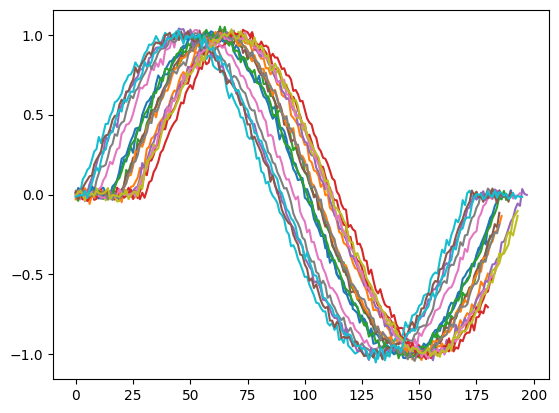

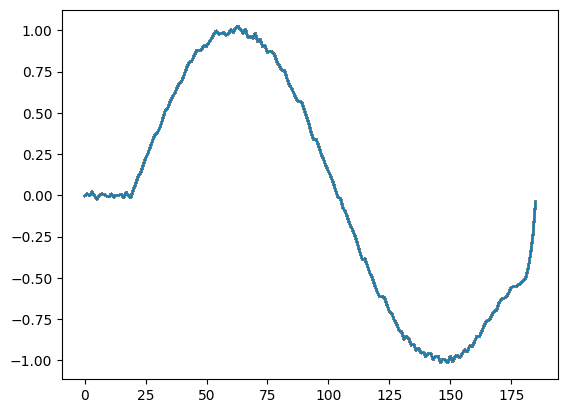

In [32]:
'''
/*******************************************************************************
 * Copyright (C) 2018 Francois Petitjean
 *
 * This program is free software: you can redistribute it and/or modify
 * it under the terms of the GNU General Public License as published by
 * the Free Software Foundation, version 3 of the License.
 *
 * This program is distributed in the hope that it will be useful,
 * but WITHOUT ANY WARRANTY; without even the implied warranty of
 * MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
 * GNU General Public License for more details.
 *
 * You should have received a copy of the GNU General Public License
 * along with this program.  If not, see <http://www.gnu.org/licenses/>.
 ******************************************************************************/
'''
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce


__author__ ="Francois Petitjean"

def performDBA(series, n_iterations=10):
    n_series = len(series)
    max_length = 0
    for s in series:
        max_length = max(max_length,s.shape[1])

    cost_mat = np.zeros((max_length, max_length))
    delta_mat = np.zeros((max_length, max_length))
    tmp_delta_mat = np.zeros((max_length, max_length))
    path_mat = np.zeros((max_length, max_length), dtype=np.int8)

    medoid_ind = approximate_medoid_index(series,cost_mat,delta_mat,tmp_delta_mat)
    center = series[medoid_ind]

    for i in range(0,n_iterations):
        center = DBA_update(center, series, cost_mat, path_mat, delta_mat,tmp_delta_mat)

    return center

def approximate_medoid_index(series,cost_mat,delta_mat,tmp_delta_mat):
    if len(series)<=50:
        indices = range(0,len(series))
    else:
        indices = np.random.choice(range(0,len(series)),50,replace=False)

    medoid_ind = -1
    best_ss = 1e20
    for index_candidate in indices:
        candidate = series[index_candidate]
        ss = sum_of_squares(candidate,series,cost_mat,delta_mat,tmp_delta_mat)
        if(medoid_ind==-1 or ss<best_ss):
            best_ss = ss
            medoid_ind = index_candidate
    return medoid_ind

def sum_of_squares(s,series,cost_mat,delta_mat,tmp_delta_mat):
    return sum(map(lambda t:squared_DTW(s,t,cost_mat,delta_mat,tmp_delta_mat),series))

def DTW(s,t,cost_mat,delta_mat):
    return np.sqrt(squared_DTW(s,t,cost_mat,delta_mat))

def squared_DTW(s,t,cost_mat,delta_mat,tmp_delta_mat):
    s_len = s.shape[1]
    t_len = t.shape[1]
    fill_delta_mat_dtw(s, t, delta_mat,tmp_delta_mat)
    cost_mat[0, 0] = delta_mat[0, 0]
    for i in range(1, s_len):
        cost_mat[i, 0] = cost_mat[i-1, 0]+delta_mat[i, 0]

    for j in range(1, t_len):
        cost_mat[0, j] = cost_mat[0, j-1]+delta_mat[0, j]

    for i in range(1, s_len):
        for j in range(1, t_len):
            diag,left,top =cost_mat[i-1, j-1], cost_mat[i, j-1], cost_mat[i-1, j]
            if(diag <=left):
                if(diag<=top):
                    res = diag
                else:
                    res = top
            else:
                if(left<=top):
                    res = left
                else:
                    res = top
            cost_mat[i, j] = res+delta_mat[i, j]
    return cost_mat[s_len-1,t_len-1]

def fill_delta_mat_dtw(center, s, delta_mat, tmp_delta_mat):
    n_dims = center.shape[0]
    len_center = center.shape[1]
    len_s=  s.shape[1]
    slim = delta_mat[:len_center,:len_s]
    slim_tmp = tmp_delta_mat[:len_center,:len_s]

    #first dimension - not in the loop to avoid initialisation of delta_mat
    np.subtract.outer(center[0], s[0],out = slim)
    np.square(slim, out=slim)

    for d in range(1,center.shape[0]):
        np.subtract.outer(center[d], s[d],out = slim_tmp)
        np.square(slim_tmp, out=slim_tmp)
        np.add(slim,slim_tmp,out=slim)

    assert(np.abs(np.sum(np.square(center[:,0]-s[:,0]))-delta_mat[0,0])<=1e-6)

def DBA_update(center, series, cost_mat, path_mat, delta_mat, tmp_delta_mat):
    options_argmin = [(-1, -1), (0, -1), (-1, 0)]
    updated_center = np.zeros(center.shape)
    center_length = center.shape[1]
    n_elements = np.zeros(center_length, dtype=int)

    for s in series:
        s_len = s.shape[1]
        fill_delta_mat_dtw(center, s, delta_mat, tmp_delta_mat)
        cost_mat[0, 0] = delta_mat[0, 0]
        path_mat[0, 0] = -1

        for i in range(1, center_length):
            cost_mat[i, 0] = cost_mat[i-1, 0]+delta_mat[i, 0]
            path_mat[i, 0] = 2

        for j in range(1, s_len):
            cost_mat[0, j] = cost_mat[0, j-1]+delta_mat[0, j]
            path_mat[0, j] = 1

        for i in range(1, center_length):
            for j in range(1, s_len):
                diag,left,top =cost_mat[i-1, j-1], cost_mat[i, j-1], cost_mat[i-1, j]
                if(diag <=left):
                    if(diag<=top):
                        res = diag
                        path_mat[i,j] = 0
                    else:
                        res = top
                        path_mat[i,j] = 2
                else:
                    if(left<=top):
                        res = left
                        path_mat[i,j] = 1
                    else:
                        res = top
                        path_mat[i,j] = 2

                cost_mat[i, j] = res+delta_mat[i, j]

        i = center_length-1
        j = s_len-1

        while(path_mat[i, j] != -1):
            updated_center[:,i] += s[:,j]
            n_elements[i] += 1
            move = options_argmin[path_mat[i, j]]
            i += move[0]
            j += move[1]
        assert(i == 0 and j == 0)
        updated_center[:,i] += s[:,j]
        n_elements[i] += 1

    return np.divide(updated_center, n_elements)


#generating synthetic data
n_series = 20
length = 200
n_dims = 201

print('Important note: the data should be structure "channels-first", ie the series should have shape (n_channels,length)')

series = list()
padding_length=30
indices = range(0, length-padding_length)
main_profile_gen = np.array([np.sin(2.0*np.pi*j/len(indices)) for j in indices])

randomizer = lambda j:np.random.normal(j,0.02)
randomizer_fun = np.vectorize(randomizer)
for i in range(0,n_series):
    n_pad_left = np.random.randint(0,padding_length)
    #adding zero at the start or at the end to shif the profile
    b = n_pad_left
    a = padding_length-n_pad_left
    padded_pattern = np.pad(main_profile_gen,(a,b),mode='constant',constant_values=0)

    #chop some of the end to prove it can work with multiple lengths
    l = np.random.randint(length-20,length+1)
    padded_pattern = padded_pattern[:l]
    padded_pattern = randomizer_fun(padded_pattern)

    series_i = np.zeros((n_dims,l))
    for d in range(0,n_dims):
        series_i[d]=padded_pattern

    series.append(series_i)

#plotting the synthetic data
for s in series:
    plt.plot(range(0,s.shape[1]), s[0])
plt.draw()
plt.show()

#calculating average series with DBA
average_series = performDBA(series)

#plotting the average series
plt.figure()
for d in range(0,n_dims):
    plt.plot(range(0,average_series.shape[1]), average_series[d])
plt.show()




In [36]:
series.shape()

AttributeError: 'list' object has no attribute 'shape'

In [28]:
jan_mondays.shape[0]

96

In [57]:

print('Important note: the data should be structure "channels-first", ie the series should have shape (n_channels,length)')

series = np.asarray(jan_mondays.values.tolist()).transpose()

#calculating average series with DBA
average_series = performDBA(series)

#plotting the average series
plt.figure()
for d in range(0,n_dims):
    plt.plot(range(0,average_series.shape[1]), average_series[d])
plt.show()


Important note: the data should be structure "channels-first", ie the series should have shape (n_channels,length)


IndexError: tuple index out of range

In [55]:
np.asarray(jan_mondays.values.tolist()).transpose().shape

(4, 96)